**Proceso de limpieza, transformación y analítica sobre el reporte de incendios en la región de Boyacá**

Documento elaborado por **Juan Andrés Caballero Martínez**

A continuación se carga el archivo .CSV que contiene el monitoreo de incendios en el departamento de Boyacá en un marco de tiempo definido. Contiene descripción detallada del lugar, tiempo, tipo y demás características propias de los incendios.

**Posterior a la elaboración de este archivo se pretende utilizar los datos de monitoreos de incendios para predecir deforestación y actividades ilegales que se relacionan con la combustión de las zonas rurales de Boyacá**

**Carga de librerías y de dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
datos = pd.read_csv('CORPOBOYACA_REPORTE_DE_INCENDIOS_DE_LA_COBERTURA_VEGETAL_20240414.csv')
pd.set_option('display.max_columns', None)
datos.head()

,Consecutivo,Entidad,Fecha del Reporte,Departamento,Municipio,Vereda o Corregimiento,Localizado Dentro de Área Protegida,Tipo de Area Protegida,Nombre Área Protegida,Fecha de Inicio,Hora de Inicio,Fecha de Finalización,Hora de Finalización,Tipo de Incendio,Causa del Incendio,Tejido urbano continúo(ha),Tejido urbano discontinuo(ha),Zonas industriales o comerciales(ha),Red vial. ferroviaria y terrenos asociados(ha),Zonas portuarias(ha),Aeropuertos(ha),Obras hidráulicas(ha),Zonas de extracción minera(ha),Zonas de disposición de residuos(ha),Zonas verdes urbanas y/o rurales(ha),Instalaciones recreativas(ha),Otros cultivos transitorios(ha),Cereales(ha),Oleaginosas y leguminosas(ha),Hortalizas(ha),Tubérculos(ha),Otros cultivos permanentes herbáceos(ha),Caña(ha),Plátano y banano(ha),Tabaco(ha),Papaya(ha),Amapola(ha),Otros cultivos permanentes arbustivos(ha),Café(ha),Cacao(ha),Viñedos(ha),Coca(ha),Otros cultivos permanentes arbóreos(ha),Palma de aceite(ha),Cítricos(ha),Mango(ha),Cultivos agroforestales(ha),Cultivos confinados(ha),Pastos limpios(ha),Pastos arbolados(ha),Pastos enmalezados(ha),Mosaico de cultivos(ha),Mosaico de pastos y cultivos(ha),Mosaico de cultivos. pastos y espacios naturales(ha),Mosaico de pastos con espacios naturales(ha),Mosaico de cultivos con espacios naturales(ha),Bosque denso alto de tierra firme(ha),Bosque denso alto inundable(ha),Bosque denso bajo de tierra firme(ha),Bosque denso bajo inundable(ha),Bosque abierto alto de tierra firme(ha),Bosque abierto alto inundable(ha),Bosque abierto bajo de tierra firme(ha),Bosque abierto bajo inundable(ha),Bosque fragmentado(ha),Bosque de galería o ripario(ha),Acacia(ha),Araucaria(ha),Caucho(ha),Ceiba(ha),Ciprés(ha),Eucalipto(ha),Flormorado(ha),Guadua plantada(ha),Melina(ha),Nogal(ha),Otras plantaciones forestales(ha),Pino(ha),Teca(ha),Herbazal denso de tierra firme no arbolado(ha),Herbazal denso de tierra firme arbolado(ha),Herbazal denso de tierra firme con arbustos(ha),Herbazal denso inundable no arbolado(ha),Herbazal denso inundable arbolado(ha),Arracachal(ha),Helechal(ha),Herbazal abierto arenoso(ha),Herbazal abierto rocoso(ha),Arbustal denso(ha),Arbustal abierto(ha),Vegetación secundaria o en transición(ha),Zonas arenosas naturales(ha),Afloramientos rocosos(ha),Tierras desnudas y degradadas(ha),Zonas quemadas(ha),Zonas glaciares y nivales(ha),Zonas pantanosas(ha),Turberas(ha),Vegetación acuática sobre cuerpos de agua(ha),Pantanos costeros(ha),Salitral(ha),Sedimentos expuestos en baja mar(ha),Bosque Natural Denso(ha),Bosque intervenido(ha),Bosque plantado(ha),Bosque Seco(ha),Cultivos(ha),Paramos(ha),Sabanas y pastizales(ha),Pastos mejorados(ha),Rastrojos(ha),Vegetación Seca(ha),Sabanas pastizales(ha),Pastos manejados(ha),Coberturas sin determinar(ha),Área Total Afectada (ha),Estado,Observaciones,Altura Minima en m.s.n.m.,Altura Maxima en m.s.n.m.
0,369508,CORPOBOYACA,51:30.0,BOYACÁ,CALDAS,NaN,Sí,NaN,NaN,2/4/2021,12:00,2/11/2021 0:00,12:00,Superficial,Descuido y negligencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,V,NaN,NaN,NaN
1,369508,CORPOBOYACA,51:30.0,BOYACÁ,CALDAS,NaN,Sí,NaN,NaN,2/4/2021,12:00,2/11/2021 0:00,12:00,Superficial,Descuido y negligencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,V,NaN,NaN,NaN
2,369508,CORPOBOYACA,51:30.0,BOYACÁ,CALDAS,Na

**Cálculo de estadísticas descriptivas generales**

A continuación se presentan las primeras estadísticas descriptivas del conjunto de datos, tales como el conteo de celdas no nulas, media, desviación estándar, mínimo, máximo y percentiles, todo ello para cada columna.

In [ ]:
datos_descripcion = datos.describe()
datos_descripcion

,Consecutivo,Nombre Área Protegida,Tejido urbano continúo(ha),Tejido urbano discontinuo(ha),Zonas industriales o comerciales(ha),Red vial. ferroviaria y terrenos asociados(ha),Zonas portuarias(ha),Aeropuertos(ha),Obras hidráulicas(ha),Zonas de extracción minera(ha),Zonas de disposición de residuos(ha),Zonas verdes urbanas y/o rurales(ha),Instalaciones recreativas(ha),Otros cultivos transitorios(ha),Cereales(ha),Oleaginosas y leguminosas(ha),Hortalizas(ha),Tubérculos(ha),Otros cultivos permanentes herbáceos(ha),Caña(ha),Plátano y banano(ha),Tabaco(ha),Papaya(ha),Amapola(ha),Otros cultivos permanentes arbustivos(ha),Café(ha),Cacao(ha),Viñedos(ha),Coca(ha),Otros cultivos permanentes arbóreos(ha),Palma de aceite(ha),Cítricos(ha),Mango(ha),Cultivos agroforestales(ha),Cultivos confinados(ha),Pastos limpios(ha),Pastos arbolados(ha),Pastos enmalezados(ha),Mosaico de cultivos(ha),Mosaico de pastos y cultivos(ha),Mosaico de cultivos. pastos y espacios naturales(ha),Mosaico de pastos con espacios naturales(ha),Mosaico de cultivos con espacios naturales(ha),Bosque denso alto de tierra firme(ha),Bosque denso alto inundable(ha),Bosque denso bajo de tierra firme(ha),Bosque denso bajo inundable(ha),Bosque abierto alto de tierra firme(ha),Bosque abierto alto inundable(ha),Bosque abierto bajo de tierra firme(ha),Bosque abierto bajo inundable(ha),Bosque fragmentado(ha),Bosque de galería o ripario(ha),Acacia(ha),Araucaria(ha),Caucho(ha),Ceiba(ha),Ciprés(ha),Eucalipto(ha),Flormorado(ha),Guadua plantada(ha),Melina(ha),Nogal(ha),Otras plantaciones forestales(ha),Pino(ha),Teca(ha),Herbazal denso de tierra firme no arbolado(ha),Herbazal denso de tierra firme arbolado(ha),Herbazal denso de tierra firme con arbustos(ha),Herbazal denso inundable no arbolado(ha),Herbazal denso inundable arbolado(ha),Arracachal(ha),Helechal(ha),Herbazal abierto arenoso(ha),Herbazal abierto rocoso(ha),Arbustal denso(ha),Arbustal abierto(ha),Vegetación secundaria o en transición(ha),Zonas arenosas naturales(ha),Afloramientos rocosos(ha),Tierras desnudas y degradadas(ha),Zonas quemadas(ha),Zonas glaciares y nivales(ha),Zonas pantanosas(ha),Turberas(ha),Vegetación acuática sobre cuerpos de agua(ha),Pantanos costeros(ha),Salitral(ha),Sedimentos expuestos en baja mar(ha),Bosque Natural Denso(ha),Bosque intervenido(ha),Bosque plantado(ha),Bosque Seco(ha),Cultivos(ha),Paramos(ha),Sabanas y pastizales(ha),Pastos mejorados(ha),Rastrojos(ha),Vegetación Seca(ha),Sabanas pastizales(ha),Pastos manejados(ha),Coberturas sin determinar(ha),Área Total Afectada (ha),Altura Minima en m.s.n.m.,Altura Maxima en m.s.n.m.
count,784.000000,0.0,506.000000,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.0,710.000000,710.0,710.0,710.0,710.0,710.000000,710.000000,710.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,610.000000,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.000000,581.000000,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,581.0,405.0,405.0,405.0,405.0,405.0,405.0,10.000000,10.000000,10.0,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,784.000000,774.000000,774.000000
mean,371629.150510,NaN,0.197628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655845,0.0,0.0,0.0,0.0,1.790704,0.428197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.692238,1.600688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,3.200000,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.762602,2502.665375,2546.505168
std,663.392591,NaN,4.445542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527005,0.0,0.0,0.0,0.0,5.100834,0.862358,0.0,0

**Resumen de los datos**

La variable clave que mayor peso tiene en la deforestación por incendios en la región es el Área Total Afectada (ha), que indica el área que fue consumida por el incendio.

A continuación se presentan sus estadísticas descriptivas.

In [ ]:
area_afectada = datos_descripcion["Área Total Afectada (ha)"]
area_afectada

count    784.000000
mean       7.762602
std       21.047726
min        1.550000
25%        2.690000
50%        2.690000
75%        2.950000
max      155.350000
Name: Área Total Afectada (ha), dtype: float64

Se muestra el intervalo de fecha de la captura de datos

In [ ]:
Inicio_monitoreo = min(datos["Fecha de Inicio"])
Fin_monitoreo = max(datos["Fecha de Inicio"])
print("Inicio_monitoreo: "+str(Inicio_monitoreo))
print("Fin_monitoreo: "+str(Fin_monitoreo))

Inicio_monitoreo: 1/13/2021
Fin_monitoreo: 9/2/2021


**Información general del dataset**

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Columns: 120 entries, Consecutivo to Altura Maxima en m.s.n.m.
dtypes: float64(104), int64(1), object(15)
memory usage: 735.1+ KB


In [ ]:
datos.dtypes

Consecutivo                    int64
Entidad                       object
Fecha del Reporte             object
Departamento                  object
Municipio                     object
                              ...   
Área Total Afectada (ha)     float64
Estado                        object
Observaciones                 object
Altura Minima en m.s.n.m.    float64
Altura Maxima en m.s.n.m.    float64
Length: 120, dtype: object

Columnas de tipo numéricas:

In [ ]:
datos.select_dtypes(include = "number").dtypes

Consecutivo                               int64
Nombre Área Protegida                   float64
Tejido urbano continúo(ha)              float64
Tejido urbano discontinuo(ha)           float64
Zonas industriales o comerciales(ha)    float64
                                         ...   
Pastos manejados(ha)                    float64
Coberturas sin determinar(ha)           float64
Área Total Afectada (ha)                float64
Altura Minima en m.s.n.m.               float64
Altura Maxima en m.s.n.m.               float64
Length: 105, dtype: object

Columnas de tipo objeto:

In [ ]:
datos.select_dtypes(include = "object").dtypes

Entidad                                object
Fecha del Reporte                      object
Departamento                           object
Municipio                              object
Vereda o Corregimiento                 object
Localizado Dentro de Área Protegida    object
Tipo de Area Protegida                 object
Fecha de Inicio                        object
Hora de Inicio                         object
Fecha de Finalización                  object
Hora de Finalización                   object
Tipo de Incendio                       object
Causa del Incendio                     object
Estado                                 object
Observaciones                          object
dtype: object

**Análisis de dataset**

Todos los datos son consistentes.

**Primeras representaciones gráficas**

La primera representación gráfica contiene el histograma de frecuencias de la altura promedio a la que ocurrieron los incendios.

In [ ]:
datos["altura_promedio"] = round(datos[["Altura Maxima en m.s.n.m.", "Altura Minima en m.s.n.m."]].mean(axis = 1, skipna = True), 2)
datos["altura_promedio"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
779    2693.0
780    2693.0
781    2693.0
782    2693.0
783    2693.0
Name: altura_promedio, Length: 784, dtype: float64

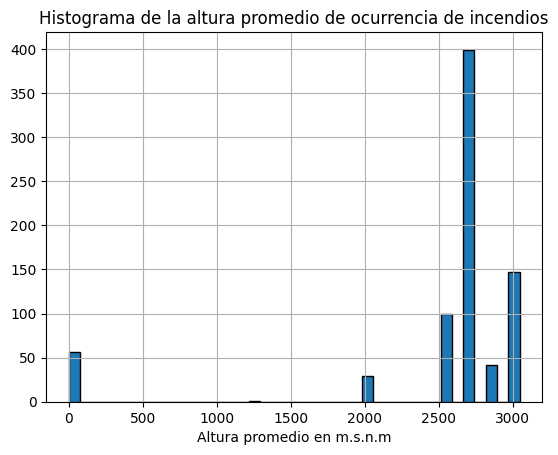

In [ ]:
datos["altura_promedio"].hist(bins = 40, edgecolor = "black")
plt.title("Histograma de la altura promedio de ocurrencia de incendios")
plt.xlabel("Altura promedio en m.s.n.m")
plt.show()

In [ ]:
intervalos_altura = np.histogram_bin_edges(datos['altura_promedio'].dropna(), bins=40)
intervalos_altura

array([   0.  ,   76.15,  152.3 ,  228.45,  304.6 ,  380.75,  456.9 ,
        533.05,  609.2 ,  685.35,  761.5 ,  837.65,  913.8 ,  989.95,
       1066.1 , 1142.25, 1218.4 , 1294.55, 1370.7 , 1446.85, 1523.  ,
       1599.15, 1675.3 , 1751.45, 1827.6 , 1903.75, 1979.9 , 2056.05,
       2132.2 , 2208.35, 2284.5 , 2360.65, 2436.8 , 2512.95, 2589.1 ,
       2665.25, 2741.4 , 2817.55, 2893.7 , 2969.85, 3046.  ])

Apartando los valores  nulos, se obtuvieron 7 intervalos.

EL intervalo en el cual se presenta la mayor incidencia de incendios es el siguiente:

In [ ]:
altura_sin_nan = datos['altura_promedio'].dropna()
frecuencia, intervalos = np.histogram(altura_sin_nan, bins=40)
indice_max_frecuencia = np.argmax(frecuencia)
intervalo_con_max_frecuencia = [intervalos[indice_max_frecuencia], intervalos[indice_max_frecuencia + 1]]
print("Intervalo con el mayor valor de frecuencia:", intervalo_con_max_frecuencia)

Intervalo con el mayor valor de frecuencia: [2665.25, 2741.4]


El área afectada por los incendios es un factor determinante en el problema. A continuación se presenta histograma.

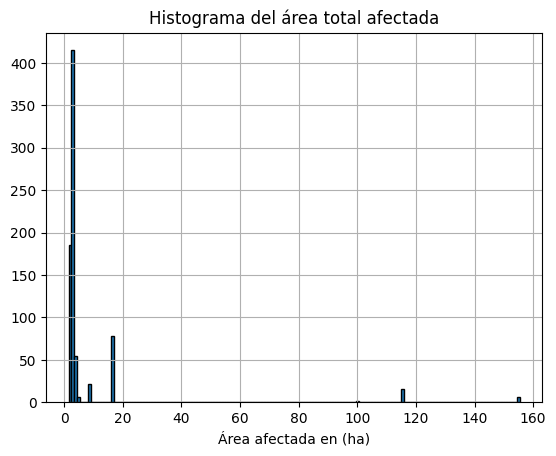

In [ ]:
datos["Área Total Afectada (ha)"].hist(bins = 160, edgecolor = "black")
plt.title("Histograma del área total afectada")
plt.xlabel("Área afectada en (ha)")
plt.show()

Se puede apreciar que los incendios suelen provocar daños en pocas extensiones de área, mientras que afectaciones mucho más grandes son atípicas.

**Limpieza y transformaciones**

Se eliminan registros duplicados

In [ ]:
datos_filtrados = datos.drop_duplicates()
datos_filtrados

,Consecutivo,Entidad,Fecha del Reporte,Departamento,Municipio,Vereda o Corregimiento,Localizado Dentro de Área Protegida,Tipo de Area Protegida,Nombre Área Protegida,Fecha de Inicio,Hora de Inicio,Fecha de Finalización,Hora de Finalización,Tipo de Incendio,Causa del Incendio,Tejido urbano continúo(ha),Tejido urbano discontinuo(ha),Zonas industriales o comerciales(ha),Red vial. ferroviaria y terrenos asociados(ha),Zonas portuarias(ha),Aeropuertos(ha),Obras hidráulicas(ha),Zonas de extracción minera(ha),Zonas de disposición de residuos(ha),Zonas verdes urbanas y/o rurales(ha),Instalaciones recreativas(ha),Otros cultivos transitorios(ha),Cereales(ha),Oleaginosas y leguminosas(ha),Hortalizas(ha),Tubérculos(ha),Otros cultivos permanentes herbáceos(ha),Caña(ha),Plátano y banano(ha),Tabaco(ha),Papaya(ha),Amapola(ha),Otros cultivos permanentes arbustivos(ha),Café(ha),Cacao(ha),Viñedos(ha),Coca(ha),Otros cultivos permanentes arbóreos(ha),Palma de aceite(ha),Cítricos(ha),Mango(ha),Cultivos agroforestales(ha),Cultivos confinados(ha),Pastos limpios(ha),Pastos arbolados(ha),Pastos enmalezados(ha),Mosaico de cultivos(ha),Mosaico de pastos y cultivos(ha),Mosaico de cultivos. pastos y espacios naturales(ha),Mosaico de pastos con espacios naturales(ha),Mosaico de cultivos con espacios naturales(ha),Bosque denso alto de tierra firme(ha),Bosque denso alto inundable(ha),Bosque denso bajo de tierra firme(ha),Bosque denso bajo inundable(ha),Bosque abierto alto de tierra firme(ha),Bosque abierto alto inundable(ha),Bosque abierto bajo de tierra firme(ha),Bosque abierto bajo inundable(ha),Bosque fragmentado(ha),Bosque de galería o ripario(ha),Acacia(ha),Araucaria(ha),Caucho(ha),Ceiba(ha),Ciprés(ha),Eucalipto(ha),Flormorado(ha),Guadua plantada(ha),Melina(ha),Nogal(ha),Otras plantaciones forestales(ha),Pino(ha),Teca(ha),Herbazal denso de tierra firme no arbolado(ha),Herbazal denso de tierra firme arbolado(ha),Herbazal denso de tierra firme con arbustos(ha),Herbazal denso inundable no arbolado(ha),Herbazal denso inundable arbolado(ha),Arracachal(ha),Helechal(ha),Herbazal abierto arenoso(ha),Herbazal abierto rocoso(ha),Arbustal denso(ha),Arbustal abierto(ha),Vegetación secundaria o en transición(ha),Zonas arenosas naturales(ha),Afloramientos rocosos(ha),Tierras desnudas y degradadas(ha),Zonas quemadas(ha),Zonas glaciares y nivales(ha),Zonas pantanosas(ha),Turberas(ha),Vegetación acuática sobre cuerpos de agua(ha),Pantanos costeros(ha),Salitral(ha),Sedimentos expuestos en baja mar(ha),Bosque Natural Denso(ha),Bosque intervenido(ha),Bosque plantado(ha),Bosque Seco(ha),Cultivos(ha),Paramos(ha),Sabanas y pastizales(ha),Pastos mejorados(ha),Rastrojos(ha),Vegetación Seca(ha),Sabanas pastizales(ha),Pastos manejados(ha),Coberturas sin determinar(ha),Área Total Afectada (ha),Estado,Observaciones,Altura Minima en m.s.n.m.,Altura Maxima en m.s.n.m.,altura_promedio
0,369508,CORPOBOYACA,51:30.0,BOYACÁ,CALDAS,NaN,Sí,NaN,NaN,2/4/2021,12:00,2/11/2021 0:00,12:00,Superficial,Descuido y negligencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.00,V,NaN,NaN,NaN,NaN
4,369568,CORPOBOYACA,53:27.0,BOYACÁ,ALMEIDA,NaN,Sí,NaN,NaN,2/11/2021,12:00,2/11/2021 0:00,12:00,Subterráneo,Descuido y negligencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,P,NaN,NaN,NaN,NaN
10,370048,CORPOBO

Se procede a tratar los valores NaN. Para ello se reemplazan aquellas celdas NaN pertenecientes a una columna numérica por la media de la misma, mientras que para las columnas categóricas se usa la moda.

In [ ]:
datos_filtrados = datos_filtrados.fillna({
    col: datos_filtrados[col].mode().iloc[0] if datos_filtrados[col].dtype == 'object' else datos_filtrados[col].mean()
    for col in datos_filtrados.columns
})
datos_filtrados

,Consecutivo,Entidad,Fecha del Reporte,Departamento,Municipio,Vereda o Corregimiento,Localizado Dentro de Área Protegida,Tipo de Area Protegida,Nombre Área Protegida,Fecha de Inicio,Hora de Inicio,Fecha de Finalización,Hora de Finalización,Tipo de Incendio,Causa del Incendio,Tejido urbano continúo(ha),Tejido urbano discontinuo(ha),Zonas industriales o comerciales(ha),Red vial. ferroviaria y terrenos asociados(ha),Zonas portuarias(ha),Aeropuertos(ha),Obras hidráulicas(ha),Zonas de extracción minera(ha),Zonas de disposición de residuos(ha),Zonas verdes urbanas y/o rurales(ha),Instalaciones recreativas(ha),Otros cultivos transitorios(ha),Cereales(ha),Oleaginosas y leguminosas(ha),Hortalizas(ha),Tubérculos(ha),Otros cultivos permanentes herbáceos(ha),Caña(ha),Plátano y banano(ha),Tabaco(ha),Papaya(ha),Amapola(ha),Otros cultivos permanentes arbustivos(ha),Café(ha),Cacao(ha),Viñedos(ha),Coca(ha),Otros cultivos permanentes arbóreos(ha),Palma de aceite(ha),Cítricos(ha),Mango(ha),Cultivos agroforestales(ha),Cultivos confinados(ha),Pastos limpios(ha),Pastos arbolados(ha),Pastos enmalezados(ha),Mosaico de cultivos(ha),Mosaico de pastos y cultivos(ha),Mosaico de cultivos. pastos y espacios naturales(ha),Mosaico de pastos con espacios naturales(ha),Mosaico de cultivos con espacios naturales(ha),Bosque denso alto de tierra firme(ha),Bosque denso alto inundable(ha),Bosque denso bajo de tierra firme(ha),Bosque denso bajo inundable(ha),Bosque abierto alto de tierra firme(ha),Bosque abierto alto inundable(ha),Bosque abierto bajo de tierra firme(ha),Bosque abierto bajo inundable(ha),Bosque fragmentado(ha),Bosque de galería o ripario(ha),Acacia(ha),Araucaria(ha),Caucho(ha),Ceiba(ha),Ciprés(ha),Eucalipto(ha),Flormorado(ha),Guadua plantada(ha),Melina(ha),Nogal(ha),Otras plantaciones forestales(ha),Pino(ha),Teca(ha),Herbazal denso de tierra firme no arbolado(ha),Herbazal denso de tierra firme arbolado(ha),Herbazal denso de tierra firme con arbustos(ha),Herbazal denso inundable no arbolado(ha),Herbazal denso inundable arbolado(ha),Arracachal(ha),Helechal(ha),Herbazal abierto arenoso(ha),Herbazal abierto rocoso(ha),Arbustal denso(ha),Arbustal abierto(ha),Vegetación secundaria o en transición(ha),Zonas arenosas naturales(ha),Afloramientos rocosos(ha),Tierras desnudas y degradadas(ha),Zonas quemadas(ha),Zonas glaciares y nivales(ha),Zonas pantanosas(ha),Turberas(ha),Vegetación acuática sobre cuerpos de agua(ha),Pantanos costeros(ha),Salitral(ha),Sedimentos expuestos en baja mar(ha),Bosque Natural Denso(ha),Bosque intervenido(ha),Bosque plantado(ha),Bosque Seco(ha),Cultivos(ha),Paramos(ha),Sabanas y pastizales(ha),Pastos mejorados(ha),Rastrojos(ha),Vegetación Seca(ha),Sabanas pastizales(ha),Pastos manejados(ha),Coberturas sin determinar(ha),Área Total Afectada (ha),Estado,Observaciones,Altura Minima en m.s.n.m.,Altura Maxima en m.s.n.m.,altura_promedio
0,369508,CORPOBOYACA,51:30.0,BOYACÁ,CALDAS,ALTO LAS PLANTAS,Sí,Regional,NaN,2/4/2021,12:00,2/11/2021 0:00,12:00,Superficial,Descuido y negligencia,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31875,0.0,0.0,0.0,0.0,2.0375,0.51125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.40,22.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.00,V,INFORME TECNICO GRD-CT-2021-002,1661.916667,1733.416667,1697.666667
4,369568,CORPOBOYACA,53:27.0,BOYACÁ,ALMEIDA,ALTO LAS PLANTAS,Sí,Regional,NaN,2/11/2021,12:00,2/11/2021 0:00,12:00,Subterráneo,Descuido y negligencia,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31875,0.0,0.0,0.0,0.0,2.0375,0.51125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.40,22.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Ahora se eliminan las columnas que sólo tengan valores NaN o ceros en su totalidad.

In [ ]:
datos_filtrados = datos_filtrados.dropna(axis = 1, how = "all")
datos_filtrados = datos_filtrados.loc[:, (datos_filtrados != 0).any(axis = 0)]
datos_filtrados["altura_promedio"] = round(datos_filtrados["altura_promedio"], 2)
datos_filtrados

,Consecutivo,Entidad,Fecha del Reporte,Departamento,Municipio,Vereda o Corregimiento,Localizado Dentro de Área Protegida,Tipo de Area Protegida,Fecha de Inicio,Hora de Inicio,Fecha de Finalización,Hora de Finalización,Tipo de Incendio,Causa del Incendio,Tejido urbano continúo(ha),Pastos limpios(ha),Mosaico de cultivos. pastos y espacios naturales(ha),Mosaico de pastos con espacios naturales(ha),Eucalipto(ha),Herbazal denso de tierra firme arbolado(ha),Herbazal denso de tierra firme con arbustos(ha),Bosque Natural Denso(ha),Bosque intervenido(ha),Cultivos(ha),Área Total Afectada (ha),Estado,Observaciones,Altura Minima en m.s.n.m.,Altura Maxima en m.s.n.m.,altura_promedio
0,369508,CORPOBOYACA,51:30.0,BOYACÁ,CALDAS,ALTO LAS PLANTAS,Sí,Regional,2/4/2021,12:00,2/11/2021 0:00,12:00,Superficial,Descuido y negligencia,25.0,0.31875,2.0375,0.51125,0.5,18.40,22.142857,0.0,8.0,1.0,9.00,V,INFORME TECNICO GRD-CT-2021-002,1661.916667,1733.416667,1697.67
4,369568,CORPOBOYACA,53:27.0,BOYACÁ,ALMEIDA,ALTO LAS PLANTAS,Sí,Regional,2/11/2021,12:00,2/11/2021 0:00,12:00,Subterráneo,Descuido y negligencia,25.0,0.31875,2.0375,0.51125,0.5,18.40,22.142857,5.0,0.0,0.0,5.00,P,INFORME TECNICO GRD-CT-2021-002,1661.916667,1733.416667,1697.67
10,370048,CORPOBOYACA,34:21.0,BOYACÁ,AQUITANIA,ALTO LAS PLANTAS,No,Regional,9/2/2021,12:00,9/2/2021 0:00,12:00,Superficial,Intencional,100.0,0.31875,2.0375,0.51125,0.5,18.40,22.142857,2.5,4.0,0.5,100.00,P,INFORME TECNICO GRD-CT-2021-002,1000.000000,1500.000000,1250.00
11,370757,CORPOBOYACA,43:49.0,BOYACÁ,SOGAMOSO,VDA LAS CAÑAS,No,Regional,1/13/2021,8:00,1/14/2021 0:00,13:00,Superficial,Intencional,0.0,0.00000,0.0000,0.00000,0.0,0.00,155.000000,2.5,4.0,0.5,155.35,P,INFORME TECNICO GRD-CT-2021-002,0.000000,0.000000,0.00
17,370968,CORPOBOYACA,09:08.0,BOYACÁ,DUITAMA,VDA SANTA HELENA,No,Regional,1/30/2021,6:00,2/1/2021 0:00,6:00,Superficial,Quemas fuera de control,25.0,0.00000,0.0000,0.00000,0.0,0.00,0.000000,2.5,4.0,0.5,4.02,V,INFORME TECNICO GRD-CT-2021-002,2945.000000,3028.000000,2986.50
24,370969,CORPOBOYACA,02:45.0,BOYACÁ,FLORESTA,VDA POTRERO,No,Regional,1/15/2021,6:00,1/15/2021 0:00,18:00,Superficial,Accidental,25.0,0.31875,2.0375,0.51125,0.0,9.06,0.000000,2.5,4.0,0.5,9.06,V,INFORME TECNICO GRD-CT-2021-002,0.000000,0.000000,0.00
61,370970,CORPOBOYACA,34:21.0,BOYACÁ,FLORESTA,VDA TENERIA,No,Regional,1/29/2021,6:00,2/3/2021 0:00,6:00,Superficial,Intencional,25.0,0.00000,0.0000,0.00000,0.0,115.10,0.000000,2.5,4.0,0.5,115.10,V,INFORME TECNICO GRD-CT-2021-002,0.000000,0.000000,0.00
77,370971,CORPOBOYACA,40:34.0,BOYACÁ,FLORESTA,VDA HORNO Y VIVAS,No,Regional,2/3/2021,6:00,2/3/2021 0:00,18:00,Superficial,Accidental,25.0,0.31875,2.0375,0.51125,0.0,2.95,0.000000,2.5,4.0,0.5,2.95,V,INFORME TECNICO GRD-CT-2021-002,0.000000,0.000000,0.00
93,370972,CORPOBOYACA,46:04.0,BOYACÁ,SOTAQUIRÁ,El Manzano,No,Regional,1/31/2021,6:00,1/31/2021 0:00,18:00,Superficial,Accidental,0.0,0.00000,0.0000,2.28000,0.0,0.00,0.000000,2.5,4.0,0.5,2.28,V,INFORME TECNICO GRD-CT-2021-002,2577.000000,2584.000000,2580.50
193,370973,CORPOBOYACA,55:42.0,BOYACÁ,SANTA ROSA DE VITERBO,VDA. LOS OLIVOS,No,Regional,2/3/2021,6:00,2/3/2021 0:00,18:00,Superficial,Intencional,25.0,0.00000,16.3000,0.00000,0.5,18.40,22.142857,2.5,4.0,0.5,16.30,V,INFORME TECNICO GRD-CT-2021-002,2987.000000,3105.000000,3046.00


In [ ]:
datos_filtrados.describe()

,Consecutivo,Tejido urbano continúo(ha),Pastos limpios(ha),Mosaico de cultivos. pastos y espacios naturales(ha),Mosaico de pastos con espacios naturales(ha),Eucalipto(ha),Herbazal denso de tierra firme arbolado(ha),Herbazal denso de tierra firme con arbustos(ha),Bosque Natural Denso(ha),Bosque intervenido(ha),Cultivos(ha),Área Total Afectada (ha),Altura Minima en m.s.n.m.,Altura Maxima en m.s.n.m.,altura_promedio
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,370849.357143,25.000000,0.318750,2.037500,0.511250,0.500000,18.400000,22.142857,2.500000,4.000000,0.500000,30.650714,1661.916667,1733.416667,1697.666667
std,757.495733,24.019223,0.446326,4.228827,0.700741,1.037749,29.051324,39.800326,0.980581,1.568929,0.196116,51.695748,1234.316283,1248.146408,1239.560101
min,369508.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.550000,0.000000,0.000000,0.000000
25%,370809.750000,25.000000,0.000000,0.000000,0.000000,0.000000,2.005000,0.000000,2.500000,4.000000,0.500000,2.755000,250.000000,375.000000,312.500000
50%,370970.500000,25.000000,0.318750,1.018750,0.511250,0.250000,18.400000,22.142857,2.500000,4.000000,0.500000,4.510000,1840.958333,1876.708333,1858.833333
75%,370973.750000,25.000000,0.318750,2.037500,0.511250,0.500000,18.400000,22.142857,2.500000,4.000000,0.500000,14.490000,2773.250000,2807.750000,2790.500000
max,372229.000000,100.000000,1.550000,16.300000,2.280000,4.000000,115.100000,155.000000,5.000000,8.000000,1.000000,155.350000,2987.000000,3105.000000,3046.000000


Finalmente se presenta una descripción de cada una de las columnas, luego de aplicar todos los filtros

In [ ]:
datos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 385
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Consecutivo                                           14 non-null     int64  
 1   Entidad                                               14 non-null     object 
 2   Fecha del Reporte                                     14 non-null     object 
 3   Departamento                                          14 non-null     object 
 4   Municipio                                             14 non-null     object 
 5   Vereda o Corregimiento                                14 non-null     object 
 6   Localizado Dentro de Área Protegida                   14 non-null     object 
 7   Tipo de Area Protegida                                14 non-null     object 
 8   Fecha de Inicio                                       14 non-null 

**Presentación de estadísticas luego de limpieza**

Se presentan primeras estadísticas, esta vez usando los datos filtrados.

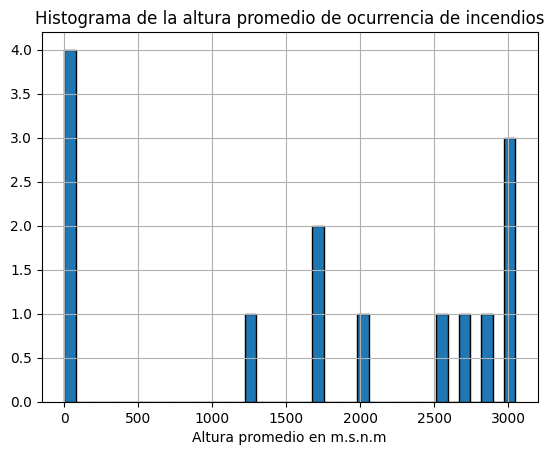

In [ ]:
datos_filtrados["altura_promedio"].hist(bins = 40, edgecolor = "black")
plt.title("Histograma de la altura promedio de ocurrencia de incendios")
plt.xlabel("Altura promedio en m.s.n.m")
plt.show()

Se sigue mostrando cómo las zonas de 2500 m.s.n.m. han presentado más incendios que aquellas con menor altitud. Esto tiene sentido ya que Boyacá tiene mucha zona rural de grandes altitudes.

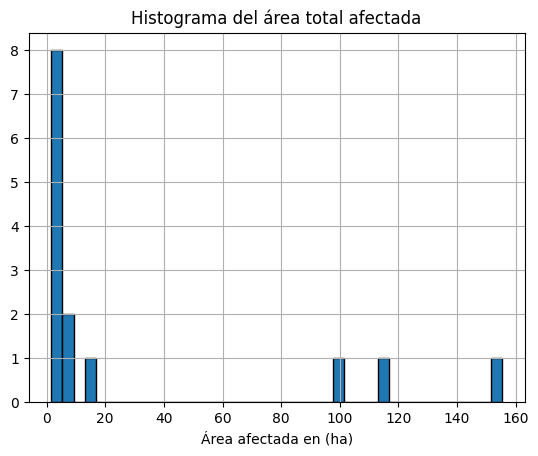

In [ ]:
datos_filtrados["Área Total Afectada (ha)"].hist(bins = 40, edgecolor = "black")
plt.title("Histograma del área total afectada")
plt.xlabel("Área afectada en (ha)")
plt.show()

Se observa que la mayor cantidad de incendios han abarcado zonas entre los 0 y 10 hectareas. En esta ocasión las frecuencias se redujeron debido a que los data sin procesar contenía muchas filas duplicadas que ahora ya fueron removidas.

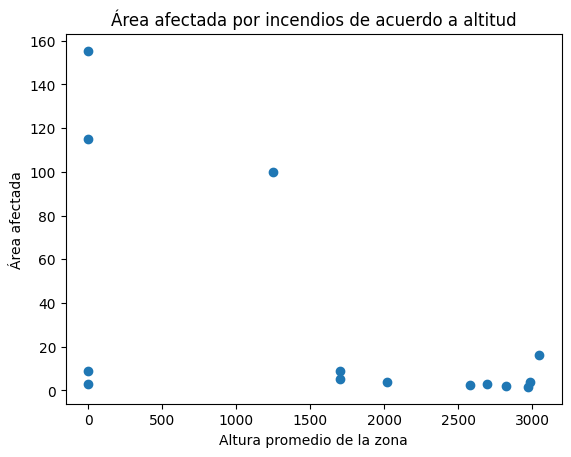

In [ ]:
plt.scatter(datos_filtrados['altura_promedio'], datos_filtrados['Área Total Afectada (ha)'])
plt.xlabel('Altura promedio de la zona')
plt.ylabel('Área afectada')
plt.title('Área afectada por incendios de acuerdo a altitud')
plt.show()

Se puede ver que aquellas zonas a una mayor altitud tuvieron menor afectación, mientras que las pocas zonas a baja altitud se vieron mayormente afectadas.

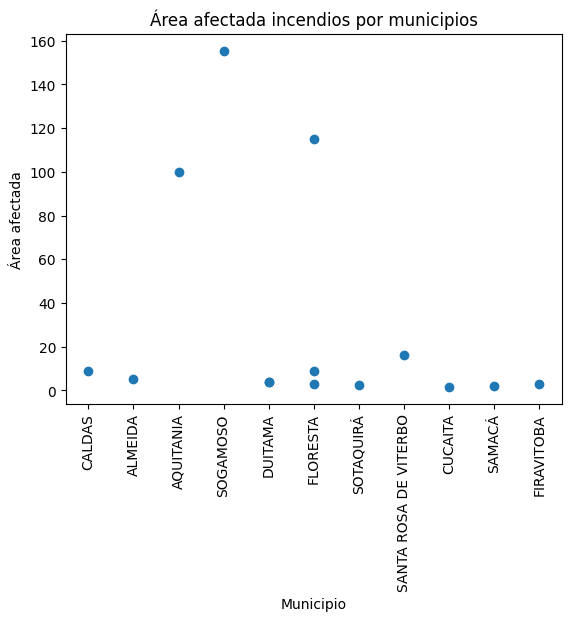

In [ ]:
plt.scatter(datos_filtrados['Municipio'], datos_filtrados['Área Total Afectada (ha)'])
plt.xlabel('Municipio')
plt.ylabel('Área afectada')
plt.title('Área afectada incendios por municipios')
plt.xticks(rotation=90)
plt.show()

Para cada municipio se reportó de a un incendio, excepto en Floresta con presencia de 3 incendios.

**Agrupaciones y pivoteos**

In [ ]:
causa_incendio = datos_filtrados[["Causa del Incendio", "Área Total Afectada (ha)"]]
causa_incendio_grouped = causa_incendio.groupby(by = "Causa del Incendio").agg({"Área Total Afectada (ha)": "mean"}).reset_index()
causa_incendio_grouped

,Causa del Incendio,Área Total Afectada (ha)
0,Accidental,4.763333
1,Descuido y negligencia,7.000000
2,Intencional,77.660000
3,Quemas fuera de control,3.570000
4,Sin definir,1.810000


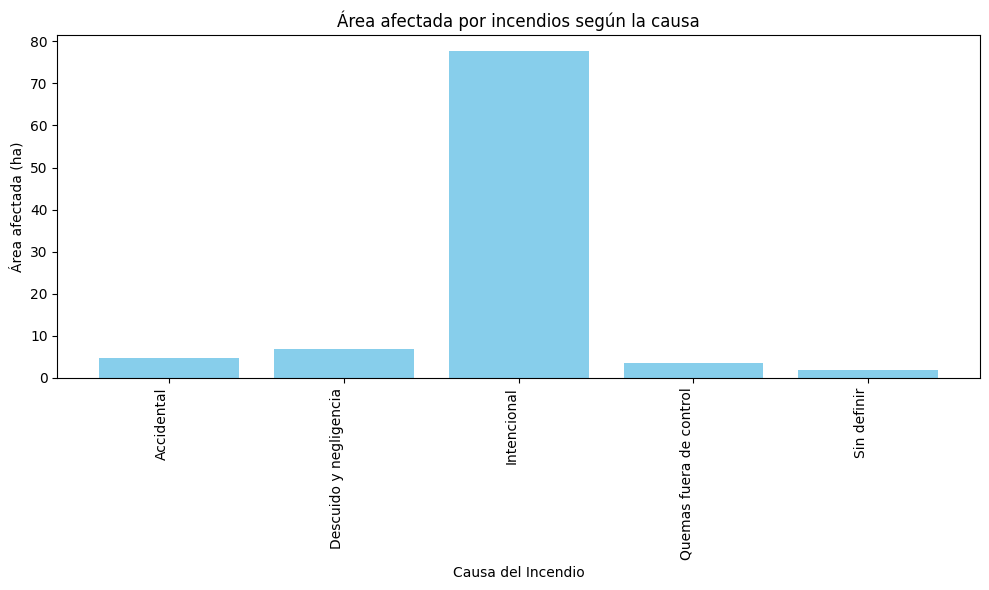

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(causa_incendio_grouped["Causa del Incendio"], causa_incendio_grouped["Área Total Afectada (ha)"], color='skyblue')
plt.xlabel('Causa del Incendio')
plt.ylabel('Área afectada (ha)')
plt.title('Área afectada por incendios según la causa')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Se observa que los incendios provocados de forma intencional generan 8 veces más afectación que aquellos dados por otras causas.

**Pivoteo**

Ahora se pretende mostrar un gráfico de las aréas afectadas por altura promedio, con la distribución de todos los tipos de terreno.

In [ ]:
tipo_terreno = datos_filtrados[["altura_promedio", "Tejido urbano continúo(ha)", "Pastos limpios(ha)",
                                          "Mosaico de cultivos. pastos y espacios naturales(ha)",
                                          "Mosaico de pastos con espacios naturales(ha)", "Eucalipto(ha)",
                                          "Herbazal denso de tierra firme arbolado(ha)", "Herbazal denso de tierra firme con arbustos(ha)",
                                          "Bosque Natural Denso(ha)", "Bosque intervenido(ha)", "Cultivos(ha)",
                                           "Localizado Dentro de Área Protegida"]]
tipo_terreno

,altura_promedio,Tejido urbano continúo(ha),Pastos limpios(ha),Mosaico de cultivos. pastos y espacios naturales(ha),Mosaico de pastos con espacios naturales(ha),Eucalipto(ha),Herbazal denso de tierra firme arbolado(ha),Herbazal denso de tierra firme con arbustos(ha),Bosque Natural Denso(ha),Bosque intervenido(ha),Cultivos(ha),Localizado Dentro de Área Protegida
0,1697.67,25.0,0.31875,2.0375,0.51125,0.5,18.40,22.142857,0.0,8.0,1.0,Sí
4,1697.67,25.0,0.31875,2.0375,0.51125,0.5,18.40,22.142857,5.0,0.0,0.0,Sí
10,1250.00,100.0,0.31875,2.0375,0.51125,0.5,18.40,22.142857,2.5,4.0,0.5,No
11,0.00,0.0,0.00000,0.0000,0.00000,0.0,0.00,155.000000,2.5,4.0,0.5,No
17,2986.50,25.0,0.00000,0.0000,0.00000,0.0,0.00,0.000000,2.5,4.0,0.5,No
24,0.00,25.0,0.31875,2.0375,0.51125,0.0,9.06,0.000000,2.5,4.0,0.5,No
61,0.00,25.0,0.00000,0.0000,0.00000,0.0,115.10,0.000000,2.5,4.0,0.5,No
77,0.00,25.0,0.31875,2.0375,0.51125,0.0,2.95,0.000000,2.5,4.0,0.5,No
93,2580.50,0.0,0.00000,0.0000,2.28000,0.0,0.00,0.000000,2.5,4.0,0.5,No
193,3046.00,25.0,0.00000,16.3000,0.00000,0.5,18.40,22.142857,2.5,4.0,0.5,No


Se pivotea la tabla pasando como eje x la altura promedio y agrupando por suma las columnas de tipo de terreno

<Figure size 1000x600 with 0 Axes>

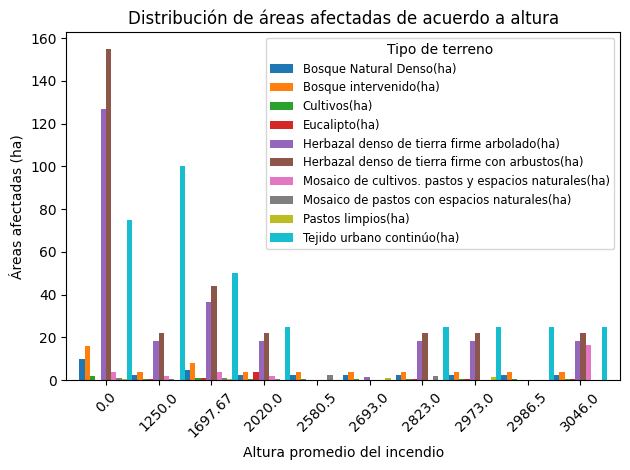

In [ ]:
#pivoteo de tabla con agrupación
pivote_altura_terreno = pd.pivot_table(tipo_terreno, index='altura_promedio', aggfunc='sum')

plt.figure(figsize=(10, 6))
pivote_altura_terreno.plot(kind='bar', width=1)

plt.xlabel('Altura promedio del incendio')
plt.ylabel('Áreas afectadas (ha)')
plt.title('Distribución de áreas afectadas de acuerdo a altura')
plt.legend(title='Tipo de terreno', fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Finalmente se presenta una última gráfica, mostrando el área promedio afectada para cada tipo de terreno de acuerdo a su ocurrió en área protegida o no

<Figure size 1000x600 with 0 Axes>

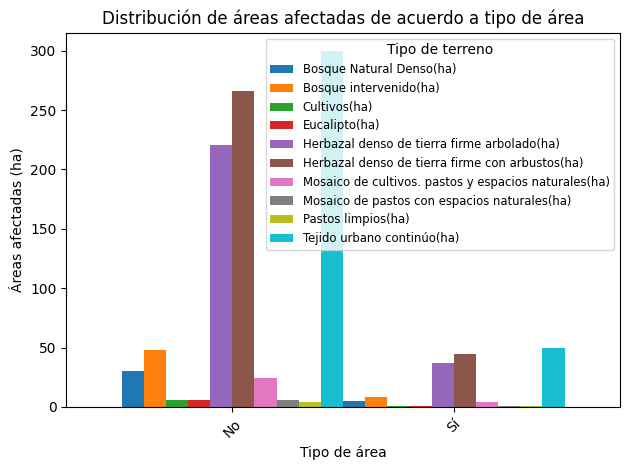

In [ ]:
area_protegida = tipo_terreno.drop("altura_promedio", axis = 1)
pivote_area_protegida = pd.pivot_table(area_protegida, index='Localizado Dentro de Área Protegida', aggfunc='sum')

plt.figure(figsize=(10, 6))
pivote_area_protegida.plot(kind='bar', width=1)

plt.xlabel('Tipo de área')
plt.ylabel('Áreas afectadas (ha)')
plt.title('Distribución de áreas afectadas de acuerdo a tipo de área')
plt.legend(title='Tipo de terreno', fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Cuando el área es protegida, destaca aquel tipo de terreno de tejido urbano continuo. En zonas no protegidas se destaca el herbazal denso de tierra firme arbolado y el herbazal denso de tiera firme con arbustos.